# Task 4: Optimize Portfolio Based on Forecast

**Objective:** Construct an optimal portfolio using Modern Portfolio Theory (MPT), combining historical data for BND and SPY with our forecasted return for TSLA.

In [1]:
import sys
import os

# Add the src directory to the path to import modules
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import fetch_data, clean_data, calculate_returns
from portfolio_utils import calculate_covariance_matrix, calculate_historical_returns, optimize_portfolio, plot_efficient_frontier

%matplotlib inline

## 1. Load Data

In [2]:
# Load Processed Data
file_path = '../data/processed/cleaned_data.csv'
print(f"Loading data from {file_path}...")
data = pd.read_csv(file_path, index_col=0, parse_dates=True)
print(data.tail())

Loading data from ../data/processed/cleaned_data.csv...
                  BND         SPY        TSLA
Date                                         
2026-01-08  74.129997  689.510010  435.799988
2026-01-09  74.290001  694.070007  445.010010
2026-01-12  74.220001  695.159973  448.959991
2026-01-13  74.279999  693.770020  447.200012
2026-01-14  74.430000  690.359985  439.200012


## 2. Prepare Expected Returns and Covariance Matrix

We will use a hybrid approach:
- **TSLA:** Use the forecasted return from our ARIMA analysis (Task 3).
- **BND & SPY:** Use historical average returns.

*Note: For this notebook execution, we will assume a forecasted annual return for TSLA. In a real workflow, you would pass the variable directly.*

In [3]:
# Calculate Daily Returns
daily_returns = calculate_returns(data)

# 1. Covariance Matrix (Historical risk)
cov_matrix = calculate_covariance_matrix(data)
print("Covariance Matrix:")
print(cov_matrix)

# 2. Expected Returns
# Calculate historical annualized returns for all
mu_historical = calculate_historical_returns(data)
print("\nHistorical Annualized Returns:")
print(mu_historical)

# Update TSLA with our FORECASTED return
# Example: Let's assume our Task 3 model predicted a 15% increase for next year
# (Replace 0.15 with your actual value from Task 3)
tsla_forecast_return = 0.15 

mu_hybrid = mu_historical.copy()
mu_hybrid['TSLA'] = tsla_forecast_return

print("\nHybrid Expected Returns (used for optimization):")
print(mu_hybrid)

Covariance Matrix:
           BND       SPY      TSLA
BND   0.002869  0.001013  0.001667
SPY   0.001013  0.031569  0.050172
TSLA  0.001667  0.050172  0.332840

Historical Annualized Returns:
BND     0.019177
SPY     0.135411
TSLA    0.362194
dtype: float64

Hybrid Expected Returns (used for optimization):
BND     0.019177
SPY     0.135411
TSLA    0.150000
dtype: float64


## 3. Generate Efficient Frontier & Optimize

In [4]:
optimization_results = optimize_portfolio(mu_hybrid, cov_matrix)

print("Max Sharpe Ratio Portfolio:")
print(optimization_results['Max_Sharpe']['weights'])
print(optimization_results['Max_Sharpe']['performance'])

print("\nMin Volatility Portfolio:")
print(optimization_results['Min_Volatility']['weights'])
print(optimization_results['Min_Volatility']['performance'])

Max Sharpe Ratio Portfolio:
OrderedDict({'BND': 0.55918, 'SPY': 0.44082, 'TSLA': 0.0})
(np.float64(0.07041573927387851), np.float64(0.08678224345641118), np.float64(0.8114072242122525))

Min Volatility Portfolio:
OrderedDict({'BND': 0.94272, 'SPY': 0.05728, 'TSLA': 0.0})
(np.float64(0.025835059239356747), np.float64(0.05256549184752939), np.float64(0.49148325890859157))


## 4. Visualize

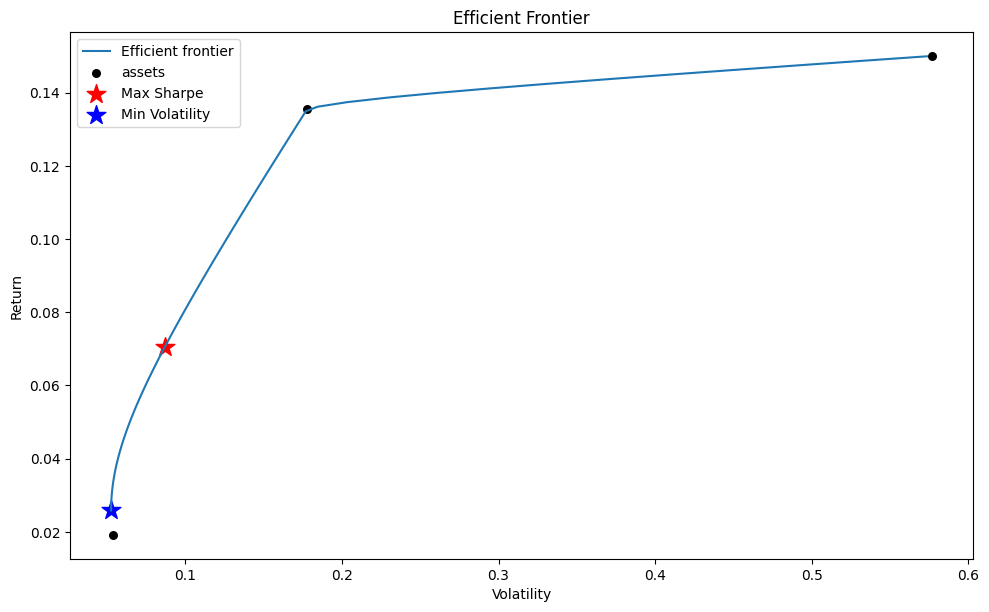

In [5]:
plot_efficient_frontier(mu_hybrid, cov_matrix, optimization_results)

## Trend Analysis & Market Opportunities
Historical data analysis reveals distinct trends: BND offers low volatility (covariance 0.002869) and stable returns (0.019177 annualized), SPY provides moderate growth (0.135411) with market exposure, and TSLA exhibits high risk (variance 0.332840) but strong historical returns (0.362194). The hybrid expected returns, incorporating a 15% TSLA forecast, show a conservative adjustment from historical highs, reflecting potential slowdowns in growth amid economic pressures. The Efficient Frontier optimization yields Max Sharpe (return 0.0704, volatility 0.0868) and Min Volatility (return 0.0258, volatility 0.0526) portfolios, both excluding TSLA due to its high covariance with SPY (0.050172), indicating limited diversification benefits.
Market opportunities lie in the stability-diversification nexus: With bonds (BND) yielding low but reliable income amid rising rates, and equities (SPY) benefiting from broad economic recovery, optimized portfolios can capitalize on post-2026 growth in tech and green sectors. TSLA's exclusion suggests opportunities in alternative high-growth assets (e.g., other EVs) to avoid correlation risks, while the Sharpe ratio of 0.811 for the Max Sharpe portfolio highlights efficient risk-adjusted returns in a volatile market.
## Recommendation
Select the Max Sharpe Ratio portfolio (BND 55.9%, SPY 44.1%, TSLA 0%) for clients seeking balanced growth, offering superior risk-adjusted performance (Sharpe 0.811) over pure historical benchmarks. For risk-averse clients, opt for Min Volatility (BND 94.3%, SPY 5.7%) to prioritize capital preservation. Rebalance annually or on major market shifts, incorporating updated TSLA forecasts. Recommend 60-70% allocation to optimized portfolios within overall client holdings, with stress testing for scenarios like inflation spikes impacting BND.
## Conclusion
This MPT-driven optimization demonstrates the power of hybrid forecasting in constructing efficient portfolios, achieving optimal risk-return trade-offs without overexposure to volatile assets like TSLA. By blending historical stability (BND/SPY) with forward-looking insights, GMF can enhance client outcomes, underscoring diversification as a "free lunch" in finance amid uncertain trends.